In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
sns.set_theme(style="whitegrid")

import numpy as np
from scipy.stats import norm, \
    beta, cauchy, expon, rayleigh, uniform
import pandas as pd

### Sklar's Theorem

$$ H(x,y) = C(F(x), G(Y)) $$
$$ x = F^{-1}(u) $$
$$ y = G^{-1}(v) $$
$$ C(u,v) = H(F^{-1}(u), G^{-1}(v)) $$

### Properties of C( ... )
$$ C(u,0) = C(0,v) = 0 $$
$$ C(u,1) = u $$
$$ C(1,v) = v $$
$$ C(u2,v2) - C(u2,v1) - C(u1,v2) + C(u1,v1) >= 0 $$

### Frechet-Hoeffding Bounds
$$ M(u,v) = min(u,v) $$
$$ W(u,v) = max(u+v-1, 0) $$
$$ W(u,v) <= C(u,v) <= M(u,v) $$

### Independence Copula
$$ \Pi(u,v) = u \times v $$

<IPython.core.display.Javascript object>


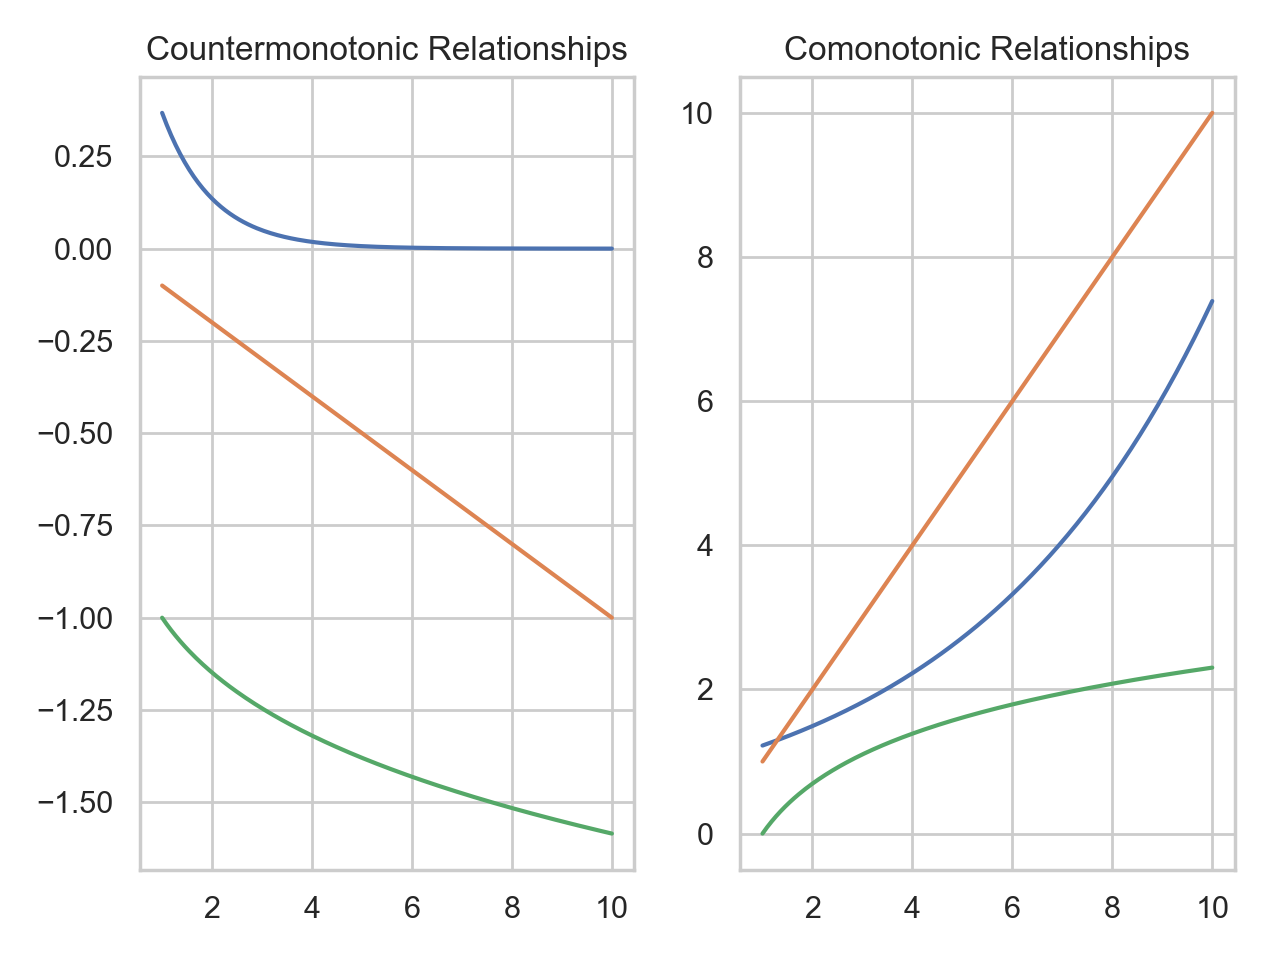

In [42]:
plt.figure()
x = np.linspace(1,10,200)

plt.subplot(1,2,1)
y = np.exp(-x)
plt.plot(x,y)
plt.plot(x,-0.1*x)
plt.plot(x, -x**(0.2))
plt.title('Countermonotonic Relationships')

plt.subplot(1,2,2)
plt.plot(x,np.exp(0.2*x))
plt.plot(x,x)
plt.plot(x,np.log(x))
plt.title('Comonotonic Relationships')

plt.tight_layout()

### Copula Density
$$ h(x,y) = c(F(x),G(y))f(x)g(y) $$

In [24]:
P = np.asarray([
    [1, 0.99],
    [0.99, 1]
])
d = P.shape[0]
n = 500

A = np.linalg.cholesky(P)
Z = np.random.normal(size=(n,d))
U_Gauss = norm.cdf(np.matmul(Z, A))

# Clayton Copula
alpha = 6
# generate a sample
u = np.random.rand(n)
t = np.random.rand(n)
v = ((t / u**(-alpha-1))**(-alpha/(1+alpha)) - u**(-alpha) + 1)**(-1/alpha)
U_Clayton = np.asarray([u, v]).T

<IPython.core.display.Javascript object>


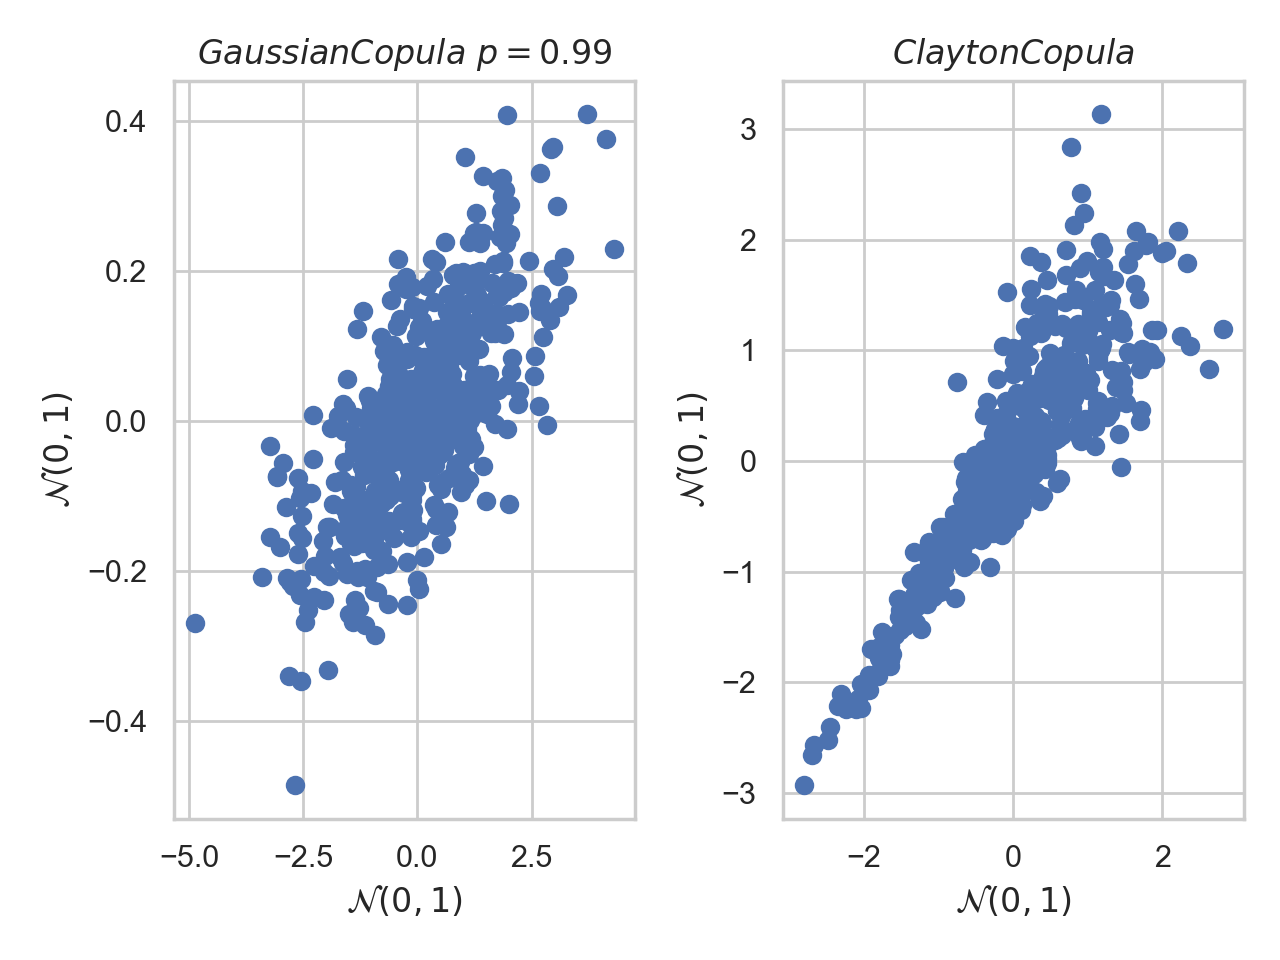

In [25]:
H1 = np.empty_like(U_Gauss)
H2 = np.empty_like(U_Clayton)
H1[:,0] = norm.ppf(U_Gauss[:,0]); H1[:,1] = norm.ppf(U_Gauss[:,1]); 
H2[:,0] = norm.ppf(U_Clayton[:,0]); H2[:,1] = norm.ppf(U_Clayton[:,1]); 

plt.figure()
plt.subplot(1,2,1)
plt.scatter(H1[:,0], H1[:,1])
plt.xlabel('$\mathcal{N}(0,1)$')
plt.ylabel('$\mathcal{N}(0,1)$')
plt.title('$Gaussian Copula\  p=%0.02f$' % (P[0,1],))

plt.subplot(1,2,2)
plt.scatter(H2[:,0], H2[:,1])
plt.xlabel('$\mathcal{N}(0,1)$')
plt.ylabel('$\mathcal{N}(0,1)$')
plt.title('$Clayton Copula\  \alpha=%0.02f$' % (alpha,))

plt.tight_layout()

<IPython.core.display.Javascript object>


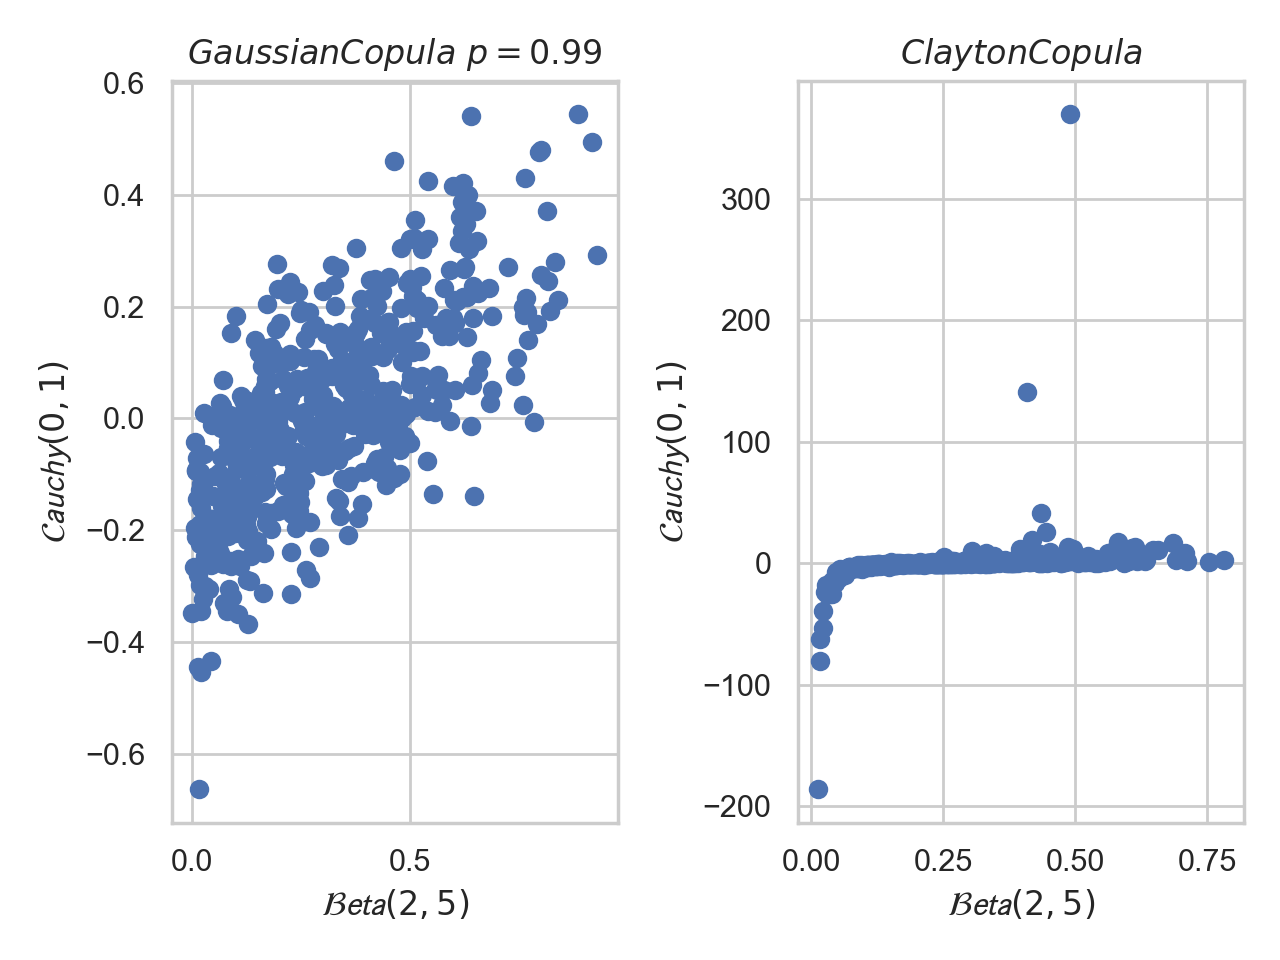

In [26]:
H1 = np.empty_like(U_Gauss)
H2 = np.empty_like(U_Clayton)
H1[:,0] = beta.ppf(U_Gauss[:,0], 2, 5); H1[:,1] = cauchy.ppf(U_Gauss[:,1]); 
H2[:,0] = beta.ppf(U_Clayton[:,0], 2, 5); H2[:,1] = cauchy.ppf(U_Clayton[:,1]); 

plt.figure()

plt.subplot(1,2,1)
plt.scatter(H1[:,0], H1[:,1])
plt.xlabel('$\mathcal{Beta}(2,5)$')
plt.ylabel('$\mathcal{Cauchy}(0,1)$')
plt.title('$Gaussian Copula\  p=%0.02f$' % (P[0,1],))

plt.subplot(1,2,2)
plt.scatter(H2[:,0], H2[:,1])
plt.xlabel('$\mathcal{Beta}(2,5)$')
plt.ylabel('$\mathcal{Cauchy}(0,1)$')
plt.title('$Clayton Copula\  \alpha=%0.02f$' % (alpha,))

plt.tight_layout()